#### [Blend of submissions - semi-final.1](https://www.kaggle.com/code/nina2025/blend-of-submissions-semi-final-1/)

&nbsp;

**algorithm.1** - assign pseudo-probabilities to each element of each row

**algorithm.2** - simple calculation - which element is more in the column - that one is selected, if there is a collision - their number is equal - the algorithm.1 is called

**algorithm.3** - an attempt will be made to cyclically call both algorithms until the moment of stopping. The moment of stopping is 0 or a slight difference in the resulting output files. Cycle will be used to assign different pseudo-probabilities several times. From the obtained experimental values it is clear that this takes place. Since the operations are performed quickly, an attempt will also be made to collect a larger number of submission files into the system.

&nbsp;

In the last work of this series - [**Blend of submissions - final**](https://www.kaggle.com/code/nina2025/blend-of-submissions-final/edit)
the **algorithm.3** mechanism will be used, the stopping point will be the execution of predefined actions (start as in Part.10), intelligent search will not be used yet. Attached to this work is a description of the algorithm in the form of screenshots + 2 submission comparison mechanisms: one is a matrix of each-to-each differences of the target, and the second is 3 matrices each-to-each, where the target is divided into three parts, as in the task requirement (map@3). Also attached is a general list of all submissions involved in this series of works (out of 13 datasets related to this competition).

public solutions:

&nbsp;

- #### LB=0.38285 - v7 - [Hill climbing](https://www.kaggle.com/code/palfig/hill-climbing/notebook?scriptVersionId=247143022) by [Palfi G](https://www.kaggle.com/palfig)
- #### LB=0.38213 - v01 - [Blending Submissions: A Cluster-Averaging Approach](https://www.kaggle.com/code/hbugrae/blending-submissions-a-cluster-averaging-approach) by [H. Buğra Eken](https://www.kaggle.com/hbugrae)
- #### LB=0.38000 - v02 - [Predicting Fertilizer Name( Stacking Ensemble)](https://www.kaggle.com/code/ayushchandramaurya/predicting-fertilizer-name-stacking-ensemble/output) by [Ayush chandra Maurya](https://www.kaggle.com/hoon0303https://www.kaggle.com/ayushchandramaurya)
- #### LB=0.37971 - v02 - [Predicting Optimal Fertilizers( Stacking )](https://www.kaggle.com/code/hoon0303/predicting-optimal-fertilizers-stacking) by [hoon0303](https://www.kaggle.com/hoon0303)
- #### LB=0.37758 - v14 - [S05E06 | Fertilizer Optimization | Ensemble](https://www.kaggle.com/code/ravaghi/s05e06-fertilizer-optimization-ensemble/notebook) by [Mahdi Ravaghi](https://www.kaggle.com/ravaghi)
- #### LB=0.38216 - v01 - [20250624_PG6_RWA](https://www.kaggle.com/code/elainedazzio/20250624-pg6-rwa/notebook) by [L. Elaine Dazzio](https://www.kaggle.com/elainedazzio)
- #### LB=0.38215 - v12 - [Blend of submissions - part 4,7,9](https://www.kaggle.com/code/nina2025/ensemble-of-top-4-public-solutions-part-4-7-9) by [Lion-li-li](https://www.kaggle.com/code/nina2025)
- #### LB=0.38192 - v05 - [Blend of submissions - part 3,5,8](https://www.kaggle.com/code/nina2025/ensemble-of-top-4-public-solutions-part-3-5-8-10) by [Lion-li-li](https://www.kaggle.com/code/nina2025)

&nbsp;

Step 1: &nbsp; 3 groups of 5 submissions (3.Top participate in each group) from the public solutions described above go through 13 different pseudo-probability schemes in turn, namely:

- Топ.3 + [0.38000, 0.37971] -> [schems] -> 13.submissions -> Groupe.1 -> &nbsp;'..GEN_25.2a'
- Топ.3 + [0.37758, 0.37971] -> [schems] -> 13.submissions -> Groupe.2 -> &nbsp;'..GEN_25.2b'
- Топ.3 + [0.37758, 0.38000] -> [schems] -> 13.submissions -> Groupe.3 -> &nbsp;'..GEN_25.2c'

Step 2: &nbsp; Each group goes through the 'same old' algorithm. 1: &nbsp; each element of the row is manually assigned a pseudo-probability, then all the obtained results are added to one row, the row is sorted in descending order and by the key of the accumulated pseudo-weight, the first three are issued as specified by the task

output: '..GEN_27.4a', '..GEN_27.4b', '..GEN_27.4c',  

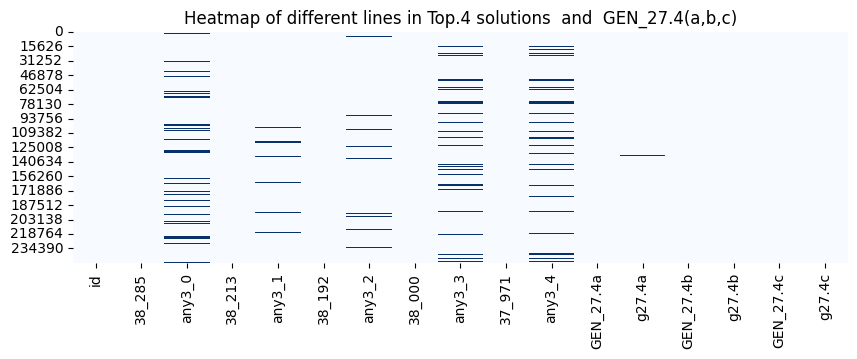

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_ = ["" for i in range(250_000)]

path = '/kaggle/input/27-june-2025-fertilizer/submission__LB__0_'


# st_names = ['38_285', '38_215', '38_213', '38_192','37_971']
# obezyany = ['any3_0', 'any3_1', 'any3_2', 'any3_3','any3_4']
# st_names += ['GEN_27.1a', 'GEN_27.1b', 'GEN_27.1c']
# obezyany += [   'g27.1a',    'g27.1b',    'g27.1c']

# def Visual_any3in4_GEN(dfs, ns, gen):
#     ns = ns[:5]
#     nslb = ns
#     nsg1 = ns + ['GEN_27.1a']
#     nsg2 = ns + ['GEN_27.1b']
#     nsg3 = ns + ['GEN_27.1c']
#     dfs['any3_0'] = dfs.apply(lambda x: f_any3in4(x, 0, nslb), axis=1)
#     dfs['any3_1'] = dfs.apply(lambda x: f_any3in4(x, 1, nslb), axis=1)
#     dfs['any3_2'] = dfs.apply(lambda x: f_any3in4(x, 2, nslb), axis=1)
#     dfs['any3_3'] = dfs.apply(lambda x: f_any3in4(x, 3, nslb), axis=1)
#     dfs['any3_4'] = dfs.apply(lambda x: f_any3in4(x, 4, nslb), axis=1)
#     dfs['g27.1a'] = dfs.apply(lambda x: f_not_equ(x, 6, nsg1), axis=1)
#     dfs['g27.1b'] = dfs.apply(lambda x: f_not_equ(x, 7, nsg2), axis=1)
#     dfs['g27.1c'] = dfs.apply(lambda x: f_not_equ(x, 8, nsg3), axis=1)
#     plt.figure(figsize=(10, 3))
#     sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
#     plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
#     plt.show()


# st_names  = ['38_285','38_216','38_213','38_000','37_758']
# obezyany  = ['any3_0','any3_1','any3_2','any3_3','any3_4']
# st_names += ['GEN_27.2a','GEN_27.2b','GEN_27.2c']
# obezyany += [   'g27.2a',   'g27.2b',   'g27.2c']

# def Visual_any3in4_GEN(dfs, ns, gen):
#     ns = ns[:5]
#     nslb = ns
#     nsg1 = ns + ['GEN_27.2a']
#     nsg2 = ns + ['GEN_27.2b']
#     nsg3 = ns + ['GEN_27.2c']
#     dfs['any3_0'] = dfs.apply(lambda x: f_any3in4(x, 0, nslb), axis=1)
#     dfs['any3_1'] = dfs.apply(lambda x: f_any3in4(x, 1, nslb), axis=1)
#     dfs['any3_2'] = dfs.apply(lambda x: f_any3in4(x, 2, nslb), axis=1)
#     dfs['any3_3'] = dfs.apply(lambda x: f_any3in4(x, 3, nslb), axis=1)
#     dfs['any3_4'] = dfs.apply(lambda x: f_any3in4(x, 4, nslb), axis=1)
#     dfs['g27.2a'] = dfs.apply(lambda x: f_not_equ(x, 5, nsg1), axis=1)
#     dfs['g27.2b'] = dfs.apply(lambda x: f_not_equ(x, 6, nsg2), axis=1)
#     dfs['g27.2c'] = dfs.apply(lambda x: f_not_equ(x, 7, nsg3), axis=1)
#     plt.figure(figsize=(10, 3))
#     sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
#     plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
#     plt.show()


# st_names  = ['38_285','38_213','38_000','37_971','37_758']
# obezyany  = ['any3_0','any3_1','any3_2','any3_3','any3_4']
# st_names += ['GEN_27.3a','GEN_27.3b','GEN_27.3c']
# obezyany += [   'g27.3a',   'g27.3b',   'g27.3c']

# def Visual_any3in4_GEN(dfs, ns, gen):
#     ns = ns[:5]
#     nslb = ns
#     nsg1 = ns + ['GEN_27.3a']
#     nsg2 = ns + ['GEN_27.3b']
#     nsg3 = ns + ['GEN_27.3c']
#     dfs['any3_0'] = dfs.apply(lambda x: f_any3in4(x, 0, nslb), axis=1)
#     dfs['any3_1'] = dfs.apply(lambda x: f_any3in4(x, 1, nslb), axis=1)
#     dfs['any3_2'] = dfs.apply(lambda x: f_any3in4(x, 2, nslb), axis=1)
#     dfs['any3_3'] = dfs.apply(lambda x: f_any3in4(x, 3, nslb), axis=1)
#     dfs['any3_4'] = dfs.apply(lambda x: f_any3in4(x, 4, nslb), axis=1)
#     dfs['g27.3a'] = dfs.apply(lambda x: f_not_equ(x, 5, nsg1), axis=1)
#     dfs['g27.3b'] = dfs.apply(lambda x: f_not_equ(x, 6, nsg2), axis=1)
#     dfs['g27.3c'] = dfs.apply(lambda x: f_not_equ(x, 7, nsg3), axis=1)
#     plt.figure(figsize=(10, 3))
#     sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
#     plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
#     plt.show()


st_names  = ['38_285','38_213','38_192','38_000','37_971']
obezyany  = ['any3_0','any3_1','any3_2','any3_3','any3_4']
st_names += ['GEN_27.4a','GEN_27.4b','GEN_27.4c']
obezyany += [   'g27.4a',   'g27.4b',   'g27.4c']
def Visual_any3in4_GEN(dfs, ns, gen):
    ns = ns[:5]
    nslb = ns
    nsg1 = ns + ['GEN_27.4a']
    nsg2 = ns + ['GEN_27.4b']
    nsg3 = ns + ['GEN_27.4c']
    dfs['any3_0'] = dfs.apply(lambda x: f_any3in4(x, 0, nslb), axis=1)
    dfs['any3_1'] = dfs.apply(lambda x: f_any3in4(x, 1, nslb), axis=1)
    dfs['any3_2'] = dfs.apply(lambda x: f_any3in4(x, 2, nslb), axis=1)
    dfs['any3_3'] = dfs.apply(lambda x: f_any3in4(x, 3, nslb), axis=1)
    dfs['any3_4'] = dfs.apply(lambda x: f_any3in4(x, 4, nslb), axis=1)
    dfs['g27.4a'] = dfs.apply(lambda x: f_not_equ(x, 5, nsg1), axis=1)
    dfs['g27.4b'] = dfs.apply(lambda x: f_not_equ(x, 6, nsg2), axis=1)
    dfs['g27.4c'] = dfs.apply(lambda x: f_not_equ(x, 7, nsg3), axis=1)
    plt.figure(figsize=(10, 3))
    sns.heatmap(dfs.isnull(), cbar=False, cmap="Blues")
    plt.title(f"Heatmap of different lines in Top.4 solutions  and  {gen}")
    plt.show()


def make_list_vs(st_names):
    list = []
    for i in range(0,len(st_names)-1):
        for j in range(i+1,len(st_names)):
            list.append(st_names[i] + "_vs_" + st_names[j])
    return list

def read(ns):
    return [pd.read_csv(path + name_subm +'.csv') for name_subm in ns]


def rename(dfs,ns=st_names):
    for i in range(len(dfs)):
        dfs[i] = dfs[i].rename(columns={'Fertilizer Name': f'{ns[i]}'})


def addany(dfs,obezyany):
    for i in range(len(dfs)):
        dfs[i][f'{obezyany[i]}'] = _


def merge(dfs):
    dfsm = pd.merge(dfs[0], dfs[1], on="id")
    for i in range(2,len(dfs)):
        dfsm = pd.merge(dfsm,dfs[i],on='id')
    return dfsm


def load():
    dfs = read(st_names)
    rename(dfs,st_names)
    addany(dfs,obezyany)
    return merge(dfs)


def f_any3in4(x,ix,ns):
    i = [n for n in range(len(ns))]
    i.remove(ix)
    if x[ns[i[0]]]==x[ns[i[1]]]==x[ns[i[2]]] and x[ns[i[0]]]!=x[ns[ix]]:
        return None
    return ""


def f_not_equ(x,l,ns):
    for i in range(len(ns)):
        for j in range(len(ns)):
            if i!=j and x[ns[i]]==x[ns[j]]:
                return ""
    return None


def make_list_vs(st_names):
    list = []
    for i in range(0,len(st_names)-1):
        for j in range(i+1,len(st_names)):
            list.append(st_names[i] + "_vs_" + st_names[j])
    return list


def equ_tt(x,target_1,target_2, pie):
    if pie == -1:
        if x[target_1]==x[target_2]:
            return 0
    else:
        if x[target_1].split()[pie] == x[target_2].split()[pie]:
            return 0
    return 1


def get_mvs(dfs, list_vs,pie):
    for vs in list_vs:
        t = vs.split('_vs_')
        dfs[vs] = dfs.apply(lambda x: equ_tt(x,t[0],t[1],pie), axis=1)
    return dfs


def query_Q_vs(name, st_names, list_vs, dfs):
    Q = []
    for st in st_names:
        vs_between = name + "_vs_" + st
        if vs_between not in list_vs:
            Q.append(0)
        else: Q.append(dfs[vs_between].sum())
    return Q


def matrix_vs(st_names,dfs,pie=-1):
    list_vs = make_list_vs(st_names)
    mvs = get_mvs(dfs, list_vs, pie)
    m1 = pd.DataFrame({'subm':st_names})
    m2 = pd.DataFrame({ name :query_Q_vs(name,st_names,list_vs,mvs) for name in st_names})
    matrix_df = pd.concat([m1,m2],axis=1)
    return matrix_df


dfs = load()

Visual_any3in4_GEN(dfs, st_names, gen='GEN_27.4(a,b,c)')


In [2]:
# for ex. if target == Urea 28-28 DAP
print('target')
matrix = matrix_vs(st_names, dfs, -1)
display(matrix)

# Urea
print('target[0]')
matrix_pie_0 = matrix_vs(st_names, dfs, 0)
display(matrix_pie_0)

# 28-28
print('target[1]')
matrix_pie_1 = matrix_vs(st_names, dfs, 1)
display(matrix_pie_1)

# DAP
print('target[2]')
matrix_pie_2 = matrix_vs(st_names, dfs, 2)
display(matrix_pie_2)

target


,subm,38_285,38_213,38_192,38_000,37_971,GEN_27.4a,GEN_27.4b,GEN_27.4c
0,38_285,0,0,0,0,0,0,0,0
1,38_213,136827,0,0,0,0,0,0,0
2,38_192,134771,84226,0,0,0,0,0,0
3,38_000,138450,124493,122735,0,0,0,0,0
4,37_971,139758,129594,120255,82298,0,0,0,0
5,GEN_27.4a,77346,90806,87701,94493,108578,0,0,0
6,GEN_27.4b,77494,91309,87389,106865,96314,22195,0,0
7,GEN_27.4c,77780,92552,101180,93117,94941,26981,27271,0


target[0]


,subm,38_285,38_213,38_192,38_000,37_971,GEN_27.4a,GEN_27.4b,GEN_27.4c
0,38_285,0,0,0,0,0,0,0,0
1,38_213,42157,0,0,0,0,0,0,0
2,38_192,40490,22274,0,0,0,0,0,0
3,38_000,40760,37122,33398,0,0,0,0,0
4,37_971,41091,39316,31876,21292,0,0,0,0
5,GEN_27.4a,20131,22795,21072,22039,27496,0,0,0
6,GEN_27.4b,20107,22911,20948,27198,22382,5624,0,0
7,GEN_27.4c,19403,24430,25955,22094,22506,5538,5608,0


target[1]


,subm,38_285,38_213,38_192,38_000,37_971,GEN_27.4a,GEN_27.4b,GEN_27.4c
0,38_285,0,0,0,0,0,0,0,0
1,38_213,89832,0,0,0,0,0,0,0
2,38_192,87790,51989,0,0,0,0,0,0
3,38_000,89299,80483,75623,0,0,0,0,0
4,37_971,90043,84826,72822,50644,0,0,0,0
5,GEN_27.4a,51377,54594,51524,56028,65607,0,0,0
6,GEN_27.4b,51431,55082,51058,64668,56916,13533,0,0
7,GEN_27.4c,50862,58372,60885,54476,55447,16048,16186,0


target[2]


,subm,38_285,38_213,38_192,38_000,37_971,GEN_27.4a,GEN_27.4b,GEN_27.4c
0,38_285,0,0,0,0,0,0,0,0
1,38_213,110943,0,0,0,0,0,0,0
2,38_192,109602,67134,0,0,0,0,0,0
3,38_000,112946,100685,100914,0,0,0,0,0
4,37_971,114004,104810,99104,65648,0,0,0,0
5,GEN_27.4a,61305,73532,71088,78417,89329,0,0,0
6,GEN_27.4b,61403,74188,70705,87786,79875,16908,0,0
7,GEN_27.4c,62371,74784,82508,76012,77681,22368,22694,0


In [3]:
df1 = pd.read_csv(path + 'GEN_27.4a.csv')  # Lb = 0.38_254
df2 = pd.read_csv(path + 'GEN_27.4b.csv')  # Lb = ?
df3 = pd.read_csv(path + 'GEN_27.4c.csv')  # Lb = ?


df = df2

df.to_csv('submission.csv', index=False)

display(df)

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 Urea
2,750002,Urea 20-20 DAP
3,750003,14-35-14 Urea 17-17-17
4,750004,Urea 20-20 10-26-26
...,...,...
249995,999995,Urea 14-35-14 17-17-17
249996,999996,14-35-14 28-28 Urea
249997,999997,Urea 10-26-26 DAP
249998,999998,10-26-26 17-17-17 DAP



Appendix

- The last two launches, during which GEN_19.1 and GEN_19.2 are generated, showed the following: Algorithm 2 has shown itself to be weaker than Algorithm 1, on this basis we will try to launch a cycle with different pseudo-probability systems of Algorithm 1, Algorithm 2 will not be used for now, to the point, there is a week left.